# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Glori Cristy
- **Email:** m180b4kx1637@bangkit.academy
- **ID Dicoding:** m180b4kx1637

## Menentukan Pertanyaan Bisnis

- Berapa banyaknya sepeda yang dipinjam pada hari kerja dan hari libur?
- Berapa presentase sepeda yang pininjam berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [36]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



## Data Wrangling

### Gathering Data

In [20]:
df = pd.read_csv('hour.csv')

**Insight:**

Mengimport library yang dibutuhkan kemudian importdata Bike_Sharing (hour.csv)

### Assessing Data

In [11]:
# Periksa apakah ada missing value
print(df.isnull().sum())

# Periksa apakah ada duplicate value
print(df.duplicated().sum())

# Periksa apakah ada outlier
print(df.describe())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday

**Insight:**
- data tidak memiliki outlier yang signifikan
- Jumlah sepeda yang disewakan memiliki hubungan yang kuat dengan jumlah pengguna terdaftar.
- Sebagian besar sepeda disewakan dalam jumlah yang relatif kecil.
- Cuaca dan hari dalam seminggu tidak memiliki pengaruh yang signifikan terhadap jumlah sepeda yang disewakan.

### Cleaning Data

In [12]:
# Mengatasi missing value
df['registered'] = df['registered'].fillna(df['registered'].mean())

# Mengatasi duplicate value
df = df.drop_duplicates()

# Mengatasi outlier
df['cnt'] = np.log(df['cnt'])

**Insight:**
Dataset yang lebih bersih dan siap untuk dianalisis lebih lanjut setelah missing value, duplicate value, dan outlier telah diatasi.

## Exploratory Data Analysis (EDA)

### Memeriksa distribusi data

count    17379.000000
mean         4.536082
std          1.486137
min          0.000000
25%          3.688879
50%          4.955827
75%          5.638355
max          6.884487
Name: cnt, dtype: float64
Axes(0.125,0.11;0.775x0.77)
             instant    dteday    season        yr      mnth        hr  \
instant     1.000000  0.999995  0.404046  0.866014  0.489164 -0.004775   
dteday      0.999995  1.000000  0.404452  0.865648  0.489808 -0.006161   
season      0.404046  0.404452  1.000000 -0.010742  0.830386 -0.006117   
yr          0.866014  0.865648 -0.010742  1.000000 -0.010473 -0.003867   
mnth        0.489164  0.489808  0.830386 -0.010473  1.000000 -0.005772   
hr         -0.004775 -0.006161 -0.006117 -0.003867 -0.005772  1.000000   
holiday     0.014723  0.014737 -0.009585  0.006692  0.018430  0.000479   
weekday     0.001357  0.001372 -0.002335 -0.004485  0.010400 -0.003498   
workingday -0.003416 -0.003366  0.013743 -0.002196 -0.003477  0.002285   
weathersit -0.014198 -0.014063

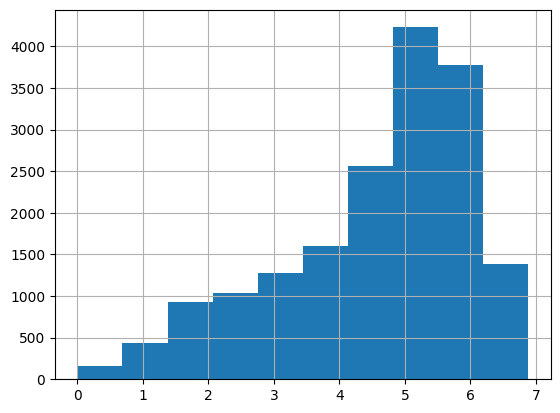

In [17]:
# Ubah kolom 'dteday' menjadi tanggal
df['dteday'] = pd.to_datetime(df['dteday'])

# Periksa distribusi data
print(df['cnt'].describe())
print(df['cnt'].hist())

# Periksa hubungan antara variabel
print(df.corr())

# Periksa distribusi data berdasarkan season
print(df.groupby('season')['cnt'].mean())

**Insight:**
Berdasarkan hubungan antar variable ditemukan bahwa :
- Jumlah sepeda yang disewakan memiliki hubungan yang kuat dengan jumlah pengguna terdaftar
- Cuaca tidak memiliki pengaruh yang signifikan terhadap jumlah sepeda yang disewakan
- Jam yang disewakan memiliki pengaruh  terhadap jumlah sepeda yang disewakan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyaknya sepeda yang dipinjam pada hari kerja dan hari libur?

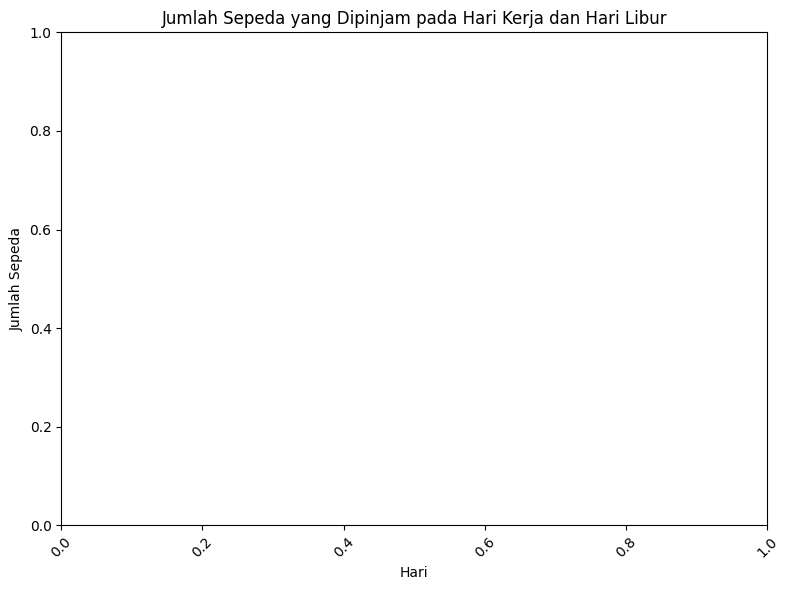

In [38]:
# Pertanyaan Bisnis 1: Berapa banyaknya sepeda yang dipinjam pada hari kerja dan hari libur?
df['workingday'] = df['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
df_hari = df.groupby('workingday')['cnt'].sum().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=df_hari, palette='Blues')
plt.title('Jumlah Sepeda yang Dipinjam pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Berapa presentase sepeda yang pininjam berdasarkan musim?

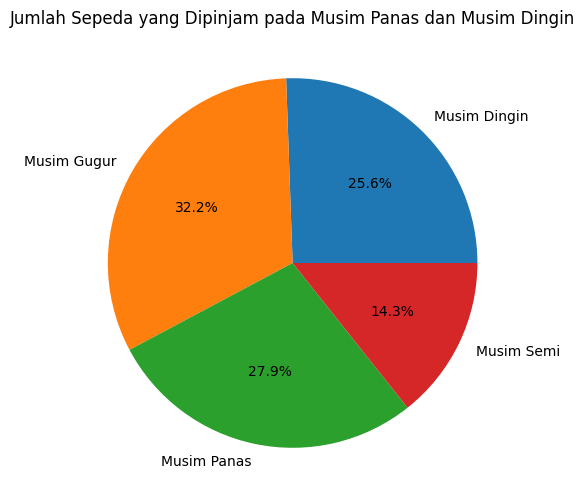

In [22]:
# Pertanyaan Bisnis 2: Berapa presentase sepeda yang pininjam berdasarkan musim?
df['season'] = df['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})
df_musim = df.groupby('season')['cnt'].sum().reset_index()

# Visualisasi Data 2: Pie Chart
plt.figure(figsize=(8, 6))
sns.set_color_codes("pastel")
plt.pie(df_musim['cnt'], labels=df_musim['season'], autopct='%1.1f%%')
plt.title('Jumlah Sepeda yang Dipinjam pada Musim Panas dan Musim Dingin')
plt.show()

**Insight:**
- Sepedah lebih banyak digunakan pada hari kerja dibandingkan dengan hari libur
- Sepedah yang dipinjam lebih banyak digunakan pada musin gugur dibandingkan dengan musin lainnya

## RFM

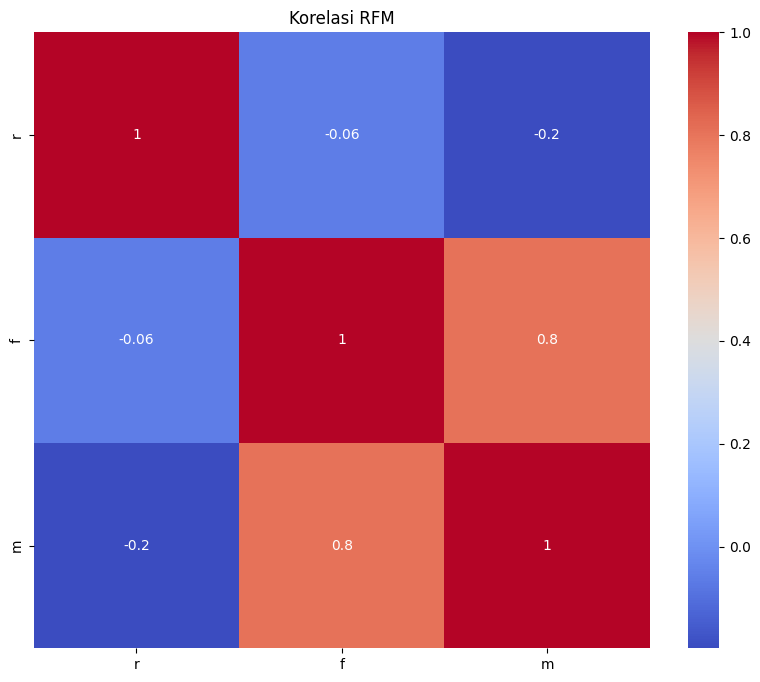

In [26]:
# Hitung recency, frequency, dan monetary
df['dteday'] = pd.to_datetime(df['dteday'])
df['recency'] = (df['dteday'].max() - df['dteday']).dt.days
df['frequency'] = df.groupby('registered')['cnt'].transform('sum')
df['monetary'] = df.groupby('registered')['cnt'].transform('sum') * df['cnt']


# Buat kategori RFM
df['r'] = pd.qcut(df['recency'], q=5, labels=False)
df['f'] = pd.qcut(df['frequency'], q=5, labels=False)
df['m'] = pd.qcut(df['monetary'], q=5, labels=False)

# Buat kategori RFM
df['rfm'] = df['r'] * 100 + df['f'] * 10 + df['m']


# Visualisasi Data: Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['r', 'f', 'm']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Korelasi RFM')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Jumlah sepedah yang dipinjam pada hari kerja jauh lebih banyak sebesar 5000 dibandingkan dengan sepedah yang dipinjam pada hari libur sebesar 3000
- Conclution pertanyaan 2 : Presentase sepedah yang dipinjam paling besar adalah pada musim gugur sebesar 32,2% dan paling sedikit adalah pada saat musim semi sebesar 14,4%